# Zume DS Takehome 2: Predict with Confidence Interval


## instructions

The task is to build a model that predicts the value of 'y' given an input of 'x'. Additionally, we need you to predict the level of uncertainty, and vizualize the confidence interval around your prediction.  
In this folder you will find a data set consisting of x,y pairs.    

### A few notes: 
1. You're free to do the analysis as you like, but explain (via markdown) your choices. 
2. Use whatever technique to create a Confidence Interval that you find appropriate. As above, explain your choice within the markdown.
3. Have a function that retuns an answer in the format of the get_prediction_and_interval function
4. At the end, plot the best prediction of "y" given "x" for with "best" prediction of "y" with 68%, 95%, and 99% intervals.

Feel free to direct any questions to shane@zume.com and/or nick.kypreos@zumepizza.com. 


# Contents

1. Introduction
2. Libraries
3. Read data
4. Plot data 
5. Split data
6. Check polynomial order
7. Find the best model
8. The main code

# 1. Introduction

Problem statement:

Have a function that retuns an answer in the format of the get_prediction_and_interval function At the end, plot the best prediction of "y" given "x" for with "best" prediction of "y" with 68%, 95%, and 99% intervals.

Solution:

Regression problems are supervised learning problems in which the response is continuous. There are many regression algorithms that I can use. First, I chose different algorithms, and selected the one with the best performance. Then I ran my model based on the chosen algorithm. Also, the problem has one predictor "x", hence I checked if a straight line is able to capture the patterns in the data or it is accounting for under-fitting. Therefore, I tried fitting a linear model with different polynomial degrees given the test error and the complexity. I selected the polynomial degree that best gives doesn't overfit the model by adding increasing complexity, yet with the lowest testing error. I checked my selected algorithm and ran it for different settings of polynomial degree and select the final model.

Once the final model was selected, I generated the prediction interval that shows the uncertainty in myestimates by predicting both an upper and lower bound fo 68%, 95%, and 99% intervals.

# 2. Libraries

In [2]:
import warnings
from sklearn.exceptions import DataConversionWarning

# plotting libraries
import matplotlib.pyplot as plt 
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# imports
import numpy as np 
import pandas as pd
import ndjson
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
import scipy.stats as st

# allow plots to appear directly Larsn the notebook
%matplotlib inline
from sklearn.linear_model import LogisticRegression
# help function for calling libraries
%config IPcompleter.greedy = True  

# 3. Read data

After reading the data, I checked to see if there are any missing values, so that this code could be generalizable to other datasets. I added a forLoop for treating the missing values by mean imputation (if there are any), and if there are no missing values, I passed. Finally my function returns a panda dataframe.

In [3]:
def read_data(filename='data.ndjson'):
    """read in data for analysis"""
    pass

In [4]:
def read_data(filename):
    
    """ read in data for analysis
        This function will return a pandafram from ndjson data
        inputs: ndjson data
        returns: pandaframe
    
    """
    
    data_list = []
    with open(filename) as f:         # read ndjson data
        datastore = ndjson.load(f)
    for i in datastore:
        dataFinal = i.values()
        data_list.append(dataFinal)   # convert the data files into an array
    df = pd.DataFrame([data_list]).T  # convert the data to panda a frame
    df[['x','y']] = pd.DataFrame(df[0].values.tolist(), index = df.index) # clean data
    df = df.drop(columns = 0)
    for i in df:                                                 # check for missing values
        if ((df[i] == 0).sum())>0 or df[i].isnull().sum() > 0  :
            df = df.replace(0,np.nan)
            df.fillna(df.mean(), inplace = True)                 # impute missing values with mean
        else:
            pass
    return df

In [5]:
df = read_data('data.ndjson')
df.head(5)  # show the data

,x,y
0,10.584227,23.446823
1,14.867693,45.228094
2,8.118707,24.939492
3,13.071239,35.450344
4,2.306874,-1.834100


In [28]:

m,n = df.shape
msk = int(m*0.8)
train = df.iloc[:msk,:]
test = df.iloc[msk:,:]
X_train = train.iloc[:,n-1]
X_test = test.iloc[:,n-1]
y_train = train.iloc[:,-1]
y_test = test.iloc[:,-1]

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(pd.DataFrame(X_train.values), pd.DataFrame(y_train.values))
yhat = model.predict(pd.DataFrame(X_test.values))

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: Unknown label type: 'continuous'

In [5]:
df.describe()  # summary of data

,x,y
count,15000.000000,15000.000000
mean,9.872282,23.404137
std,4.110319,15.251282
min,-2.138749,-2.995863
25%,6.789843,10.262563
50%,9.728282,23.643079
75%,12.583935,36.382296
max,27.498231,49.995394


# 4. Plot data

Later to choose the right critical value for a confidence interval, and whether it is possible to express the critical value as a z-score, I check the distribution of the data. The critical value is a factor used to compute the margin of error.  According to the Central Limit Theorem when the sample size is large (15000), a z-score can be used as the critical value.  The z-value, which appears in the margin of error formula, measures the number of standard errors to be added and subtracted to achieve desired confidence level (the percentage confidence you want). Consequently, confidence levels and their corresponding z*-values are shown below.

99% - 2.58
95% -1.96
68% - 0.994

For example, when confidence scores 0.95, it means that 95% of all the samples their sample mean will be within 1.96 std of the predicted value. 


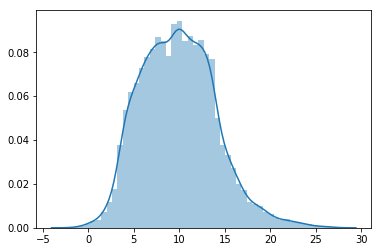

In [15]:
def plot(data):
    
    """
    This function is used to check if the data is normally used or not
    Input: data
    Returns: histogram and the scatter plot
    
    """
    m,n = df.shape 
    sns.distplot(data[list(data)[0:n-1]])
    plt.show()

plot(df)    
 

# 5. Split data

Split arrays or matrices into random train and test subsets in order to run the model on the training and and test it on the testing set. This action will help us see if the model is generalizable to new datasets or not

In [7]:
def train_test(data):
    
    """
    This function is used to split the data
    Input: data
    Returns: training and testing data
    
    """
        
    X = data['x']
    y = data['y']
    x_train, x_test, y_train, y_test = train_test_split(X, y ,test_size=0.33, random_state=0)
    return  x_train, x_test, y_train, y_test
    

# 6. Check polynomial order

Polynomial regression is very similar, but it allows for a linear combination of an input variable raised to varying degrees. We can see that a linear function (polynomial with degree 1) is not sufficient to fit the training samples. This is called underfitting. A polynomial of degree 6 approximates the true function almost perfectly. However, for higher degrees the model will overfit the training data, i.e. it learns the noise of the training data. We evaluate quantitatively overfitting / underfitting by using cross-validation. We calculate the mean squared error (MSE) on the validation set, the higher, the less likely the model generalizes correctly from the training data.

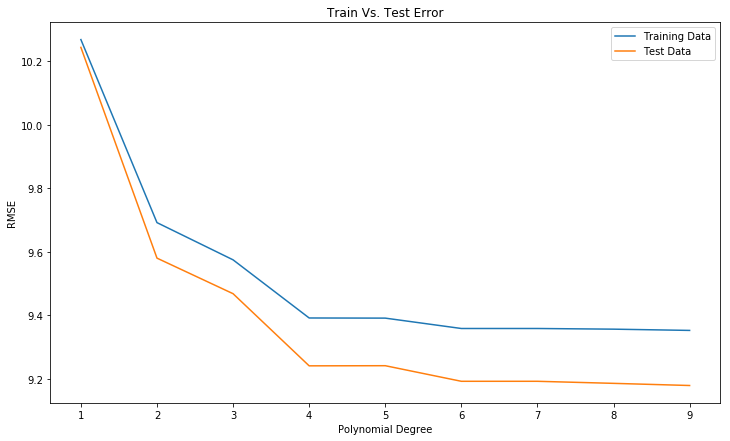

In [8]:
# Split up your data
X_train, X_test, y_train, y_test =  train_test(df)

def get_rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def GeneratePolyFeature(X_train, X_test, y_train, y_test):
    
    """
    This function return the mean squared error for different polynomial order
    Input: data
    Returns: plot of training and testing error for different degrees
    
    """
    
    # Create dataframe to collect the RMSE, and plot later
    rmse_df = pd.DataFrame(columns=["degree", "rmse_train", "rmse_test"])
    for i in range(1, 10):
        p = np.polyfit(X_train, y_train, deg=i)
        # Get the rmse for each prediction
        rmse_df.loc[i-1] = [i,
                            get_rmse(y_train, np.polyval(p, X_train)),
                            get_rmse(y_test, np.polyval(p, X_test))]
    # Plot
    plt.figure(figsize=(12, 7))
    plt.plot(rmse_df.degree, rmse_df.rmse_train, label='Training Data')
    plt.plot(rmse_df.degree, rmse_df.rmse_test, label='Test Data')
    plt.ylabel('RMSE')
    plt.xlabel('Polynomial Degree')
    plt.legend()
    plt.title('Train Vs. Test Error') 
    plt.show()
    
GeneratePolyFeature(X_train, X_test, y_train, y_test)    

By looking at degree = 6 on the graph. At this point the test error does not increase as complexity increases, which we would expect from this small sample of data. At degree = 6 our RMSE is mostly stable. I don’t want to overfit the model by adding increasing complexity, so I’m comfortable using this polynomial degree to fit my final model.

In [9]:
def create_polynomial_regression_model(degree,X_train, X_test ):
    
    """
    This function generates a new feature matrix consisting of all 
    polynomial combinations of the features with degree less than or equal to the specified degree. 
    For example, if an input sample is two dimensional 
    and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].
    Input: training and test data
    Returns: new sets of raining and test data
    
    """
    
    # transforms the existing features to higher degree features.
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(pd.DataFrame(X_train.values))
    X_test_poly = poly_features.fit_transform(pd.DataFrame(X_test.values))
    return X_train_poly,X_test_poly

X_train_poly,X_test_poly = create_polynomial_regression_model(6,X_train, X_test )

# 7. Find the best model

The differing scales of the raw data may impact these algorithms. Part of a requirement for a standardised data set is to have each attribute have a mean value of zero and a standard deviation of 1. I implement standardisation using pipelines. I then use cross-validation to validate performance of algorithms in totality.

In [16]:
def CompareDifferentModels(X_train,y_train):
    
    """
    This function runs based on different models and returns the
    cross-validation to validate performance of algorithms in totality.
    Input: Training data
    Returns: Evaluate a score by cross-validation
    
    """
    
    pipelines = []
    pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
    pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
    pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
    pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
    pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
    pipelines.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))

    results = []
    names = []
    for name, model in pipelines:
        kfold = KFold(n_splits=10, random_state=21)
        cv_results = cross_val_score(model, pd.DataFrame(X_train), pd.DataFrame(y_train), cv=kfold, scoring='neg_mean_squared_error')
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

print('Results when using polynomial combinations of the features with degree 6:') 
print(' ')
Best_model = CompareDifferentModels(X_train_poly,y_train)
print(' ')
print('Results when using the original data set:')
print(' ')
Best_model = CompareDifferentModels(X_train,y_train) 

Results when using polynomial combinations of the features with degree 6:
 
ScaledLR: -87.726274 (3.541318)
ScaledLASSO: -99.859054 (2.901614)
ScaledEN: -118.264636 (2.994060)
ScaledKNN: -103.768283 (5.123423)
ScaledCART: -172.465090 (11.656949)
ScaledGBM: -87.430652 (3.526489)
 
Results when using the original data set:
 
ScaledLR: -105.510945 (3.912982)
ScaledLASSO: -106.507213 (3.246060)
ScaledEN: -122.258897 (3.225993)
ScaledKNN: -103.754166 (5.138726)
ScaledCART: -172.448526 (11.557024)
ScaledGBM: -87.436547 (3.519035)


It looks like when using polynomial of degree 6 both models behave the same, however, when using only one polynomial of degree 1, the Gradient Boosting Regressor operforms the best using a scaled version of the data. Results show that boosting seems to be very robust against overfitting.

I chose Gradient Boosting Regressor to build the regression algorithm using. Though GBM is fairly robust at higher number of trees but it can still overfit at a point. Hence, this should be tuned using CV. 

Next: The GBM will be tested with a few n_estimators (the number of sequential trees to be modeled) using the GridSearchCV function. 

### 7.1. Test number of sequential trees to be modeled

In [17]:
def GBMGridSearchCV(X_train,y_train):
    
    """
    This function return the best n_estimators
    Input: Training data
    Returns: The best number of trees
    
    """
    
    scaler = StandardScaler().fit(pd.DataFrame(X_train) )
    rescaledX = scaler.transform(pd.DataFrame(X_train))
    param_grid = dict(n_estimators=np.array([50,100,200,300,400]))
    model = GradientBoostingRegressor(random_state=21)
    kfold = KFold(n_splits=10, random_state=21)
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kfold)
    grid_result = grid.fit(rescaledX, pd.DataFrame(y_train))

    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))

    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    best = grid_result.best_params_
    return best
    
best = GBMGridSearchCV(X_train,y_train)
best

-87.193271 (3.454826) with: {'n_estimators': 50}
-87.436547 (3.519035) with: {'n_estimators': 100}
-88.094089 (3.725101) with: {'n_estimators': 200}
-88.694105 (3.961606) with: {'n_estimators': 300}
-89.296048 (4.094122) with: {'n_estimators': 400}
Best: -87.193271 using {'n_estimators': 50}


{'n_estimators': 50}

We can see that the best number of estimators is 50.

# 8. The main code

Now that we know the best optimized algorithms and parameters we put them together for the final code

In [18]:
 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
 
class LRPI:
    
    def __init__(self, normalize=False, n_jobs=1):
        self.normalize = normalize
        self.n_jobs = n_jobs
        #self.LR = LinearRegression(normalize=self.normalize, n_jobs= self.n_jobs)
        self.LR = GradientBoostingRegressor(n_estimators=best.values()[0])
 
    def read_data(self,filename):
        
        """ 
        read in data for analysis
        This function will return a pandafram from ndjson data
        inputs: ndjson data
        returns: pandaframe
    
        """
        data_list = []
        with open(filename) as f:              # read ndjson data 
            datastore = ndjson.load(f)
            for i in datastore:
                dataFinal = i.values()
                data_list.append(dataFinal)    # convert the data files into an array
        df = pd.DataFrame([data_list]).T       # convert the data to panda a frame
        df[['x','y']] = pd.DataFrame(df[0].values.tolist(), index = df.index)        # clean data
        df = df.drop(columns = 0)
    
        for i in df:                                                 # check for missing values
            if ((df[i] == 0).sum())>0 or df[i].isnull().sum() > 0  :
                df = df.replace(0,np.nan)
                df.fillna(df.mean(), inplace = True)                 # impute missing values with mean
            else:
                pass
        return df 
    
    def plot(self, data):
        
        """
        This function is used to check if the data is normally used or not
        Input: data
        Returns: histogram and the scatter plot
    
        """
        m,n = df.shape 
        sns.distplot(data[list(data)[0:n-1]])
        plt.show()
           
    def train_test(self, data):
             
        """
        This function is used to split the data
        Input: data
        Returns: training and testing data
      
        """
        X = data['x']
        y = data['y']
        X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.33, random_state=0)
        return  X_train, X_test, y_train, y_test
    
    def create_polynomial_regression_model(self, degree,X_train, X_test ):
        
        """
        This function generates a new feature matrix consisting of all 
        polynomial combinations of the features with degree less than or equal to the specified degree. 
        For example, if an input sample is two dimensional 
        and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].
        Input: training and test data
        Returns: new sets of raining and test data
    
        """
        # transforms the existing features to higher degree features.
        poly_features = PolynomialFeatures(degree = degree)
        X_train_poly = poly_features.fit_transform(pd.DataFrame(X_train.values))
        X_test_poly = poly_features.fit_transform(pd.DataFrame(X_test.values))
        return X_train_poly,X_test_poly
        
    def fit(self, X_train, y_train, t_value):
        self.X_train = pd.DataFrame(X_train.values)
        self.y_train = pd.DataFrame(y_train.values)
        self.t_value = t_value
        self.LR.fit(self.X_train, self.y_train)
        X_train_fit = self.LR.predict(self.X_train)
        self.MSE = mean_squared_error(X_train_fit ,self.y_train)

    def predict(self, X_test):
        
        """
        This function generates prediction and predictions and intervals
        Input: X_test
        Returns: pandaFrame results and predictions in dictionary and intervals
    
        """
        
        self.X_test = pd.DataFrame(X_test.values)
        self.y_pred = self.LR.predict(self.X_test)
       
        self.X_test.loc[: ,'const_one'] =1
        stdev = np.sqrt(self.MSE)
        results = pd.DataFrame(self.y_pred , columns=['Pred'])
        interval = self.t_value * stdev
        results.loc[:,'lower'] = results['Pred'] - interval
        results.loc[:,'upper'] = results['Pred'] + interval
        results.loc[:,'coef'] = self.t_value
        prediction_dictionary = results[['Pred','lower','upper','coef']].to_dict()
        return results, prediction_dictionary, interval 
    
    def accuracy(self, y_test):
        
        """
        This function generates accuracies
        Input: y_test
        Returns: mean square error, Root Mean Square Error, R^2 
    
        """
        
        y_test = pd.DataFrame(y_test.values)
        MSE = mean_squared_error(self.y_pred ,y_test)
 
        # evaluating the model on test dataset
        rmse_test = np.sqrt(mean_squared_error(y_test, self.y_pred))
        r2_test = r2_score(y_test, self.y_pred)
        print("The model performance for the test set")
        print("-------------------------------------------")
        print("RMSE of test set is {}".format(rmse_test))
        print("R2 score of test set is {}".format(r2_test))
        print("MSE score {}".format(MSE))
        return MSE,rmse_test,r2_test 
 
        

### 8.1. Run the code

The model performance for the test set
-------------------------------------------
RMSE of test set is 9.19183585129
R2 score of test set is 0.635933176854
MSE score 84.4898463171


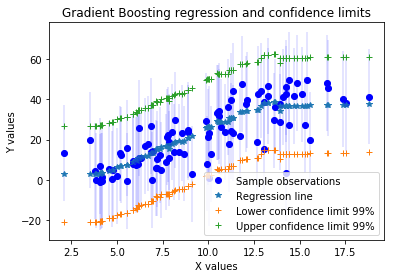

        Pred      lower      upper   coef
0  30.881700   7.144545  54.618854  2.576
1  26.411040   2.673885  50.148194  2.576
2  34.139352  10.402197  57.876506  2.576
3  30.881700   7.144545  54.618854  2.576
4   5.012997 -18.724157  28.750151  2.576
5  11.026436 -12.710718  34.763590  2.576
6  16.693308  -7.043847  40.430462  2.576
7  36.852083  13.114928  60.589237  2.576
8  29.343509   5.606354  53.080663  2.576
9  16.693308  -7.043847  40.430462  2.576
The model performance for the test set
-------------------------------------------
RMSE of test set is 9.19183585129
R2 score of test set is 0.635933176854
MSE score 84.4898463171


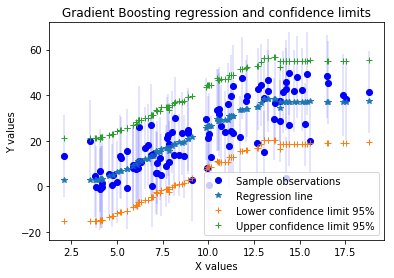

        Pred      lower      upper  coef
0  30.881700  12.820821  48.942578  1.96
1  26.411040   8.350161  44.471918  1.96
2  34.139352  16.078473  52.200230  1.96
3  30.881700  12.820821  48.942578  1.96
4   5.012997 -13.047881  23.073875  1.96
5  11.026436  -7.034442  29.087314  1.96
6  16.693308  -1.367571  34.754186  1.96
7  36.852083  18.791204  54.912961  1.96
8  29.343509  11.282630  47.404387  1.96
9  16.693308  -1.367571  34.754186  1.96
The model performance for the test set
-------------------------------------------
RMSE of test set is 9.19183585129
R2 score of test set is 0.635933176854
MSE score 84.4898463171


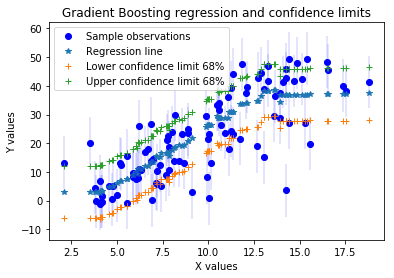

        Pred      lower      upper   coef
0  30.881700  21.722254  40.041145  0.994
1  26.411040  17.251594  35.570485  0.994
2  34.139352  24.979906  43.298797  0.994
3  30.881700  21.722254  40.041145  0.994
4   5.012997  -4.146448  14.172443  0.994
5  11.026436   1.866991  20.185882  0.994
6  16.693308   7.533862  25.852753  0.994
7  36.852083  27.692637  46.011528  0.994
8  29.343509  20.184063  38.502954  0.994
9  16.693308   7.533862  25.852753  0.994


In [19]:
model = LRPI() 
df = model.read_data('data.ndjson')
X_train, X_test, y_train, y_test  = model.train_test(df)
xtrain_poly, xtest_poly = model.create_polynomial_regression_model(6,X_train, X_test )

def get_prediction_and_interval(conf):
    Zscore = ( np.round(st.norm.ppf(1-(1-conf)/2),3))  
    model.fit(pd.DataFrame(xtrain_poly[:,1:]), y_train, Zscore)
    results, stub, interval  = model.predict(pd.DataFrame(xtest_poly[:,1:]))
    model.accuracy(y_test)
    
    # set-up the plot
    plt.xlabel('X values')
    plt.ylabel('Y values')
    plt.title('Gradient Boosting regression and confidence limits')
 
    # plot sample data
    plt.plot(np.array(X_test[:100]), np.array(y_test[:100]),'bo',label='Sample observations',)
    # plot line of best fit
    plt.plot(np.array(X_test[:100]), np.array(results['Pred'][:100]),'*' ,label='Regression line')
    # plot confidence limits
    plt.plot(np.array(X_test[:100]), np.array(results['lower'][:100]),'+' ,label='Lower confidence limit ' + str(int(conf*100)) + '%')
    plt.plot(np.array(X_test[:100]), np.array(results['upper'][:100]),'+' ,label='Upper confidence limit ' + str(int(conf*100)) + '%')
    # configure legend
    plt.legend(loc=0)
    leg = plt.gca().get_legend()
    ltext = leg.get_texts()
    plt.setp(ltext, fontsize=10)
    plt.errorbar(np.array(X_test[:100]), np.array(y_test[:100]), yerr=interval , color='b', fmt='o', alpha= 0.14)
 
    # show the plot
    plt.show()  
    return results.head(10)

print(get_prediction_and_interval(0.99))
print(get_prediction_and_interval(0.95))
print(get_prediction_and_interval(0.68))
   

 

In the above, I showed the results of my best model with  MSE score of 84.48, using Gradient Boosting regression. I showed the upper and lower bound for the given confidence score. I plotted  the best prediction of "y" given "x" for with "best" prediction of "y" with 68%, 95%, and 99% intervals. 

I calculated confidence intervals based on : Confidence interval = sample statistic +- Margin of error. Where, margin of error (ME): ME = critical value * standard error. Since the sample size is large, a z-score analysis produces the same result for the critical value. 

The prediction interval quantifies the uncertainty of a single point prediction. The uncertainty comes from the errors in the model itself and noise in the input data. The model is an approximation of the relationship between the input variables and the output variables. Here confidence interval can be used to quantify the uncertainty of the estimated skill of a model. 

Each plot shows the raw dataset as a scatter plot, the predictions for the dataset as a rlight blue, and the prediction and prediction interval as a green and orange dot and line respectively.

prediction interval is an estimate of an interval in which a future observation will fall, with a certain probability. For example for a confidence level of 95%, given the best prediction of ‘y’ given ‘x’, there is a 95% likelihood that the upper and lower limits cover the true outcome. AS this level is gets smaller (68%), more the limits get tighter.